In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Concatenate, Flatten, Input, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [3]:
# Load the air quality data
air_quality_data = pd.read_csv(r'C:\Users\tvams\OneDrive\Desktop\Imputation methods\Step-3.csv')


In [4]:
# Perform min-max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(air_quality_data.drop(columns=['Date', 'AQI']))
X_normalized = normalized_data
y = air_quality_data['AQI']


In [5]:
# Reshape data for LSTM/GRU input
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [6]:
# Define LSTM, GRU, and RNN layers
lstm_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_output = LSTM(50, activation='relu', return_sequences=True)(lstm_input)

gru_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
gru_output = GRU(50, activation='relu', return_sequences=True)(gru_input)

rnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
rnn_output = SimpleRNN(50, activation='relu', return_sequences=True)(rnn_input)

# Concatenate outputs of LSTM, GRU, and RNN layers
concatenated = Concatenate(axis=1)([lstm_output, gru_output, rnn_output])

# Flatten concatenated output
flattened = Flatten()(concatenated)

# Dense layer for final prediction
output = Dense(1)(flattened)


In [7]:
# Define hybrid model
model = Model(inputs=[lstm_input, gru_input, rnn_input], outputs=output)
start_time = time.time()
# Compile hybrid model
model.compile(optimizer='adam', loss='mse')
end_time = time.time()
compilation_time = end_time - start_time

# Train hybrid model
history = model.fit([X_train, X_train, X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test, X_test, X_test], y_test), verbose=1)
print(f"Compilation Time: {compilation_time:.2f} seconds")

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 67876.0781 - val_loss: 61070.8867
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61820.3320 - val_loss: 48680.1367
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47615.2070 - val_loss: 32383.9902
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29092.0996 - val_loss: 20377.2422
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18141.8027 - val_loss: 14672.8340
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14938.1299 - val_loss: 12563.3906
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12441.8760 - val_loss: 11184.2812
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11609.2754 - val_loss: 9664.1660
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9570.3564 - val_loss: 7903.0928
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7601.1611 - val_loss: 6065.6221
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6111.6289 - v

In [8]:
# Predict using hybrid model
y_pred = model.predict([X_test, X_test, X_test])

# Calculate evaluation metrics for hybrid model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Hybrid Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Hybrid Model Evaluation:
MAE: 13.2706
MSE: 353.0722
RMSE: 18.7902
R2 Score: 0.9794


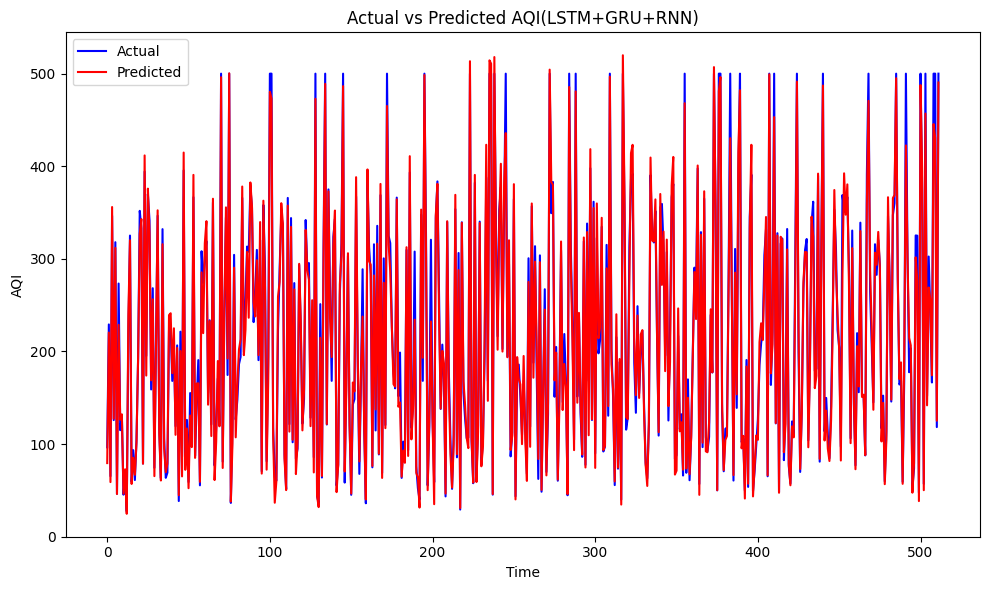

In [9]:
# Plot actual vs predicted AQI values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI(LSTM+GRU+RNN)')
plt.legend()
plt.tight_layout()


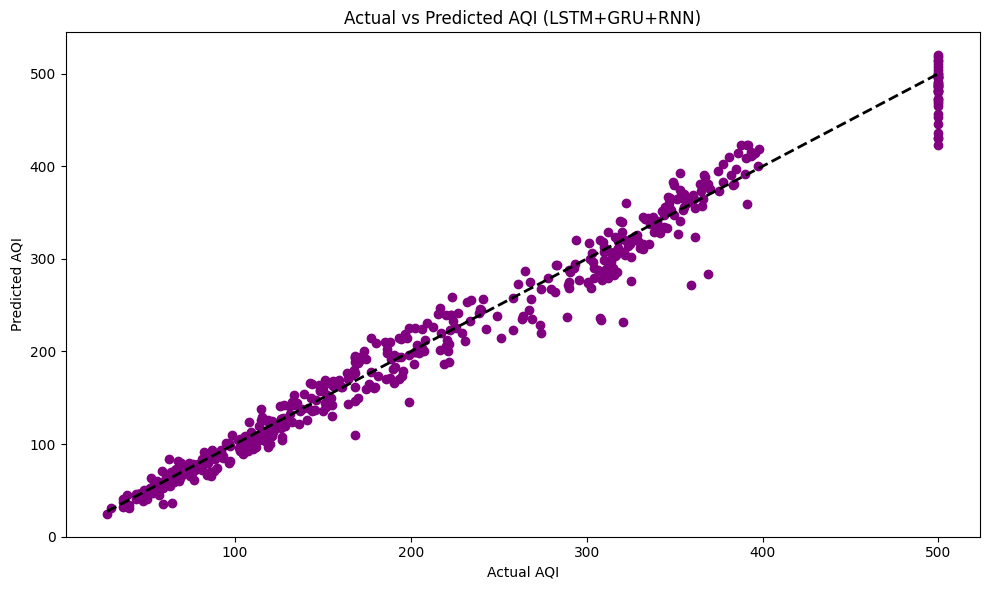

In [12]:
# Plot actual vs predicted AQI values for RNN model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (LSTM+GRU+RNN)')
plt.tight_layout()
plt.show()